In [1]:
import numpy as np
from CartPole import CartPole
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from ipywidgets import interact
import sobol_seq
import progressbar
from time import sleep
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm





Create a matrix S that contains different vector states used as column vectors.

In [2]:
# A function that return a matrix which contains n number of states as column vector
def initialisation(n,mode):
    if mode=="Position":
        x=np.linspace(-10,10,int(n))
        o=np.full(n,np.pi)
        v=np.zeros(n)
        w=np.zeros(n)
    elif mode=="Velocity":
        x=np.zeros(n)
        o=np.full(n,np.pi)
        v=np.linspace(-10,10,int(n))
        w=np.zeros(n)
    elif mode=="Angle":
        x=np.zeros(n)
        o=np.linspace(-np.pi,np.pi,int(n))
        v=np.zeros(n)
        w=np.zeros(n)
    elif mode=="Angular Velocity":
        x=np.zeros(n)
        o=np.full(n,np.pi)
        v=np.zeros(n)
        w=np.linspace(-15,15,int(n))
    elif mode=="Random":
        x=np.random.uniform(low=-10, high=10, size=(int(n)))
        o=np.random.uniform(low=-np.pi, high=np.pi, size=(int(n)))
        v=np.random.uniform(low=-10, high=10, size=(int(n)))
        w=np.random.uniform(low=-15, high=15, size=(int(n)))
    S=np.array([x,v,o,w])
    return S

def basis_func(M):
    seed = 1
    # How much each parameter has to be scaled
    rbfs = np.empty((0, 4))
    # The two is there as we go from -0.5 to 0.5 after shifting
    par_range = np.array([10, 10, np.pi, 15])*2
    for i in range(M):
        vec, seed = sobol_seq.i4_sobol(4, seed)
        vec = np.multiply((vec - 0.5), par_range)
        rbfs = np.vstack((rbfs, vec))
    return rbfs.T

Plotting Functions

In [3]:

#this section contains different plotting fucntion which is used to make the code more readable and
#to focus on the important things in the code
def singleplot_scatter_log(X,Y,xlabel,ylabel,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.scatter(X,Y,alpha=1)
    ax.set_xlim(1e-6,1e-1) 
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(Title)
    ax.set_xscale('log')
    plt.show()

def singleplot_scatter(X,Y,xlabel,ylabel,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    plt.scatter(X,Y,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(Title)
    plt.show()
def singleplot(X,Y,xlabel,ylabel,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    plt.plot(X,Y,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(Title)
    plt.show()
def singleplot_scatter_2(X,Y,Z,xlabel,ylabel,Title1,Title2,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    Z = np.squeeze(np.asarray(Z))
    
    
    plt.scatter(X,Y,alpha=1,label=Title1)
    plt.scatter(X,Z,alpha=1,linewidth=0.1,label=Title2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(Title)
    plt.show()
def singleplot_scatter_2_line(X,Y,Z,xlabel,ylabel,Title1,Title2,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    Z = np.squeeze(np.asarray(Z))
    
    
    plt.plot(X,Y,alpha=1,label=Title1)
    plt.plot(X,Z,alpha=1,label=Title2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(Title)
    plt.show()
def Plot_3D(X,Y,Z,xlabel,ylabel,zlabel,title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    Z = np.squeeze(np.asarray(Z))
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.scatter(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.set_zlim(0,0.5)                                          
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)

    ax.view_init(elev=45)

    plt.show()

def singleplot_scatter_4(X,Y,xlabel,ylabel,Title1,Title2,Title3,Title4,Title):
    X = np.squeeze(np.asarray(X))
    Y0 = np.squeeze(np.asarray(Y[0,:]))
    Y1 = np.squeeze(np.asarray(Y[1,:]))
    Y2 = np.squeeze(np.asarray(Y[2,:]))
    Y3 = np.squeeze(np.asarray(Y[3,:]))
    
    plt.scatter(X,Y0,alpha=1,label=Title1)
    plt.scatter(X,Y1,alpha=1,label=Title2)
    plt.scatter(X,Y2,alpha=1,label=Title3)
    plt.scatter(X,Y3,alpha=1,label=Title4)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(Title)
    plt.show()
    
def multipleplot_2(X,Y,Z,xlabel,ylabel,zlabel,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    Z = np.squeeze(np.asarray(Z))
    plt.figure(1)
    plt.suptitle(Title)
    plt.subplot(211)
    plt.plot(X,Z,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(zlabel)

    plt.subplot(212)
    plt.plot(Y,Z,alpha=1)
    plt.xlabel(ylabel)
    plt.ylabel(zlabel)
    plt.subplots_adjust(right=2,hspace=0.6)
    plt.show()

def multipleplot(X,Y,Z,xlabel,ylabel,zlabel,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    Z = np.squeeze(np.asarray(Z))
    plt.figure(1)
    plt.suptitle(Title)
    plt.subplot(211)
    plt.plot(X,Y,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.subplot(212)
    plt.plot(X,Z,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(zlabel)
    plt.subplots_adjust(right=2,hspace=0.6)
    plt.show()

def stateplot(X,Y,Z,W,A,xlabel,ylabel,zlabel,wlabel,Alabel,Title):
    X = np.squeeze(np.asarray(X))
    Y = np.squeeze(np.asarray(Y))
    Z = np.squeeze(np.asarray(Z))
    W = np.squeeze(np.asarray(W))
    A = np.squeeze(np.asarray(A))
    plt.figure(1)
    plt.suptitle(Title,x=1,fontsize=16)
    plt.subplot(221)
    plt.plot(X,Y,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.subplot(222)
    plt.plot(X,Z,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(zlabel)
    
    plt.subplot(223)
    plt.plot(X,W,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(wlabel)
    
    plt.subplot(224)
    plt.plot(X,A,alpha=1)
    plt.xlabel(xlabel)
    plt.ylabel(Alabel)
    
    plt.subplots_adjust(right=2,hspace=0.6)
    plt.show()

def stateplot_scatter(X,Y,x0label,x1label,x2label,x3label,y0label,y1label,y2label,y3label,Title):
    X0 = np.squeeze(np.asarray(X[0,:]))
    X1 = np.squeeze(np.asarray(X[1,:]))
    X2 = np.squeeze(np.asarray(X[2,:]))
    X3 = np.squeeze(np.asarray(X[3,:]))
    Y0 = np.squeeze(np.asarray(Y[0,:]))
    Y1 = np.squeeze(np.asarray(Y[1,:]))
    Y2 = np.squeeze(np.asarray(Y[2,:]))
    Y3 = np.squeeze(np.asarray(Y[3,:]))
    plt.figure(1)
    plt.suptitle(Title,x=1,fontsize=16)
    plt.subplot(221)
    plt.scatter(X0,Y0)
    plt.xlabel(x0label)
    plt.ylabel(y0label)

    plt.subplot(222)
    plt.scatter(X1,Y1)
    plt.xlabel(x1label)
    plt.ylabel(y1label)
    
    plt.subplot(223)
    plt.scatter(X2,Y2)
    plt.xlabel(x2label)
    plt.ylabel(y2label)
    
    plt.subplot(224)
    plt.scatter(X3,Y3)
    plt.xlabel(x3label)
    plt.ylabel(y3label)
    
    plt.subplots_adjust(right=2,bottom=0.1,top=0.9,hspace=0.6)
    plt.show()
def stateplot_plot_comparison(X,Y,Z,x0label,y0label,y1label,y2label,y3label,Title):
    X=np.squeeze(np.asarray(X))
    Z0 = np.squeeze(np.asarray(Z[0,:]))
    Z1 = np.squeeze(np.asarray(Z[1,:]))
    Z2 = np.squeeze(np.asarray(Z[2,:]))
    Z3 = np.squeeze(np.asarray(Z[3,:]))
    Y0 = np.squeeze(np.asarray(Y[0,:]))
    Y1 = np.squeeze(np.asarray(Y[1,:]))
    Y2 = np.squeeze(np.asarray(Y[2,:]))
    Y3 = np.squeeze(np.asarray(Y[3,:]))
    plt.figure(1)
    plt.suptitle(Title,x=1,fontsize=16)
    plt.subplot(221)
    plt.plot(X,Y0,label="Position Real")
    plt.plot(X,Z0,label="Positoin Predict")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y0label)

    plt.subplot(222)
    plt.plot(X,Y1,label="Velocity Real")
    plt.plot(X,Z1,label="Velocity Predict")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y1label)
    
    plt.subplot(223)
    plt.plot(X,Y2,label="Angle Real")
    plt.plot(X,Z2,label="Angle Predict")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y2label)
    
    plt.subplot(224)
    plt.plot(X,Y3,label="Angular Velocity Real")
    plt.plot(X,Z3,label="Angular Velocity Predict")
    plt.legend()
    plt.xlabel(x0label)
    plt.ylabel(y3label)
    
    plt.subplots_adjust(right=2,bottom=0.1,top=0.9,hspace=0.6)
    plt.show()

Task 1.1

In [4]:
A=np.array([[1,2,3]])
print(A[0,:])

[1 2 3]


In [5]:
# this function evalutates the dynamics of the cart from an inital condition for
# a certain number of seconds and returns a matrix containt the consequent states as
# column vectors
def dynamic(t,state):
    cart=CartPole()
    cart.setState(state)
    S=np.reshape(state,(4,1))
    for i in range(int(t*10)):
        cart.performAction(0)
        cart.remap_angle()
        S1=np.matrix(cart.getState())
        S = np.hstack([S,S1.T])
    return S[:,1:]

# a function that plots the dynamics using the interact function so it is more interractable.
def dynamic_plot(t=100,x=0,v=0,o=np.pi,w=0):
    cart=CartPole()
    state=np.array([x,v,o,w])
    T=np.arange(0,t,cart.delta_time)
    S=dynamic(t,state)
    stateplot(T,S[0,:],S[1,:],S[2,:],S[3,:],'Time $s$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$', r'State Plot $x$={} $m$, $v$ = {} $ms$, $\theta$={} $rad$, $\omega$ = {} $rads$'.format(state[0],state[1],state[2],state[3]))

In [6]:
interact(dynamic_plot,t=(0,100,10), x=(-10, 10, 0.25), v=(-10, 10, 1), o=(-np.pi,np.pi,0.25),w=(-15,15,1));

interactive(children=(IntSlider(value=100, description='t', step=10), FloatSlider(value=0.0, description='x', …

TASK 1.2

In [7]:
# a function that returns the a plot which helps visualings the first model of the system
def model1(n,mode):
    X=initialisation(n,mode)
    cart=CartPole()
    Y=np.empty((4,1))
    for i in range(len(X[1])):
        cart.setState(X[:,i])
        cart.performAction(0)
        S1=np.matrix(cart.getState())
        Y= np.hstack([Y,S1.T])
    Y=Y[:,1:]
    if mode=="Position":
        singleplot_scatter_4(X[0,:],Y,"X-position $m$","State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$x$-slice")
    elif mode=="Velocity":
        singleplot_scatter_4(X[1,:],Y,"X-Velocity $ms^{-1}$","State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$v$-slice")
    elif mode=="Angle":
        singleplot_scatter_4(X[2,:],Y,"X-Angle $rad$","State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\theta$-slice")
    elif mode=="Angular Velocity":
        singleplot_scatter_4(X[3,:],Y,"X-Angular Velocity $rads^{-1}$","State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\omega$-slice")
    
        
        


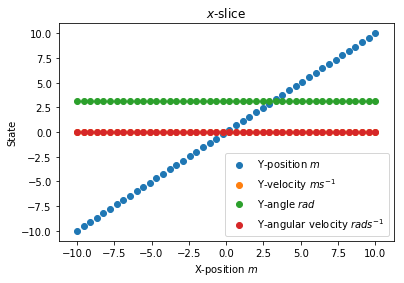

In [8]:
model1(46,"Position")

In [9]:

def model2(t,state):
    cart=CartPole()
    cart.setState(state)
    X_0=dynamic(t,state)
    X_1=dynamic(t+cart.delta_time,state)
    Y=X_1[:,1:]-X_0
    return X_0,Y

def model2_plot(t=100,x=0,v=0,o=np.pi,w=0):
    state=np.array([x,v,o,w])
    X,Y=model2(t,state)
    stateplot_scatter(X,Y,"Position X $m$","Velocity X $ms^{-1}$","Angle X $rad$","Angular Velocity X $rad s^{-1}$","Position Y $m$","Velocity Y $ms^{-1}$","Angle Y $rad$","Angular Velocity Y $rad s^{-1}$",r" State Plot $x$={},$v$ = {}, $\theta$={}, $\omega$ = {}".format(state[0],state[1],state[2],state[3]))
    

In [10]:
interact(model2_plot,t=(0,50,0.1), x=(-10, 10, 0.25), v=(-10, 10, 1), o=(-np.pi,np.pi,0.25),w=(-15,15,1));

interactive(children=(FloatSlider(value=50.0, description='t', max=50.0), FloatSlider(value=0.0, description='…

In [11]:
# this functions return the inital matrix containing differnt initialisations along
# with the matrix which contains the change of state
def model3(n,mode):
    X_0=initialisation(n,mode)
    cart=CartPole()
    X_1=np.empty((4,1))
    for i in range(len(X_0[1])):
        cart.setState(X_0[:,i])
        cart.performAction(0)
        S1=np.matrix(cart.getState())
        X_1= np.hstack([X_1,S1.T])
    X_1=X_1[:,1:]
    Y=X_1-X_0
    return X_0,Y

# a function that helps visualising the model
def model3_plot(n,mode):
    X,Y=model3(n,mode)
    if mode=="Position":
        singleplot_scatter_4(X[0,:],Y,"X-position $m$","Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$x$-slice")
    elif mode=="Velocity":
        singleplot_scatter_4(X[1,:],Y,"X-Velocity $ms^{-1}$","Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$v$-slice")
    elif mode=="Angle":
        singleplot_scatter_4(X[2,:],Y,"X-Angle $rad$","Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\theta$-slice")
    elif mode=="Angular Velocity":
        singleplot_scatter_4(X[3,:],Y,"X-Angular Velocity $rads^{-1}$","Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\omega$-slice")

# a function that visualises the model in a 2D contour plot


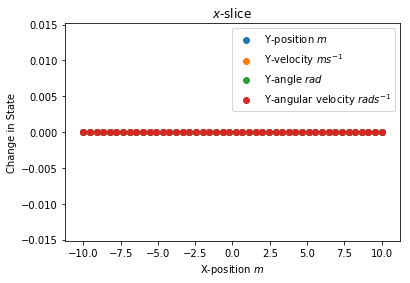

In [12]:
model3_plot(46,"Position")


TASK 2
Task 2.1

Gathering data

In [13]:
# a function that gathers data from a random initialisation matrices and finds the
# the change in state
def data(n):
    X_0=basis_func(n)
    cart=CartPole()
    X_1=np.empty((4,1))
    for i in range(len(X_0[1])):
        cart.setState(X_0[:,i])
        cart.performAction(0)
        S1=np.matrix(cart.getState())
        X_1= np.hstack([X_1,S1.T])
    X_1=X_1[:,1:]
    Y=X_1-X_0
    return X_0,Y

LINEAR REGRESSION

In [14]:
# this function adds a column of 1s to account for the bias term in the linear regression model
def bias(X):
    bias= np.ones(X.shape[1])
    X=np.vstack([bias,X])
    return X
# this function outputs the W containg the coefficients for the linear regression model    
def linear_regression(n):
    X,Y=data(n)
    W=np.linalg.lstsq(X.T,Y.T)[0]
    return W

# These functions compares the change in state in test data with the predicted change in state
# using the linear regression model
def comparison_linear_1D_scan(mode,n,W):
    X_test,Y_test=model3(n,mode)
    Y_mean= np.matmul(W.T,X_test)
    if mode=="Position":
        stateplot_plot_comparison(X_test[0,:],Y_test,Y_mean,'$X_{test}$-position $m$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Position")
    elif mode=="Velocity":
        stateplot_plot_comparison(X_test[1,:],Y_test,Y_mean,'$X_{test}$-velocity $ms^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Velocity")
    elif mode=="Angle":
        stateplot_plot_comparison(X_test[2,:],Y_test,Y_mean,'$X_{test}$-angle $rad$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angle")
    elif mode=="Angular Velocity":
        stateplot_plot_comparison(X_test[3,:],Y_test,Y_mean,'$X_{test}$-angular velocity $rads^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angular Velocity")
def comparison_single_plot_linear_1D_scan(n,mode,W):
    X_test,Y_test=model3(n,mode)
    Y_mean= np.matmul(W.T,X_test)
    if mode=="Position":
        singleplot_scatter_4(X_test[0,:],Y_mean,"X-position $m$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$x$-slice")
    elif mode=="Velocity":
        singleplot_scatter_4(X_test[1,:],Y_mean,"X-Velocity $ms^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$v$-slice")
    elif mode=="Angle":
        singleplot_scatter_4(X_test[2,:],Y_mean,"X-Angle $rad$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\theta$-slice")
    elif mode=="Angular Velocity":
        singleplot_scatter_4(X_test[3,:],Y_mean,"X-Angular Velocity $rads^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\omega$-slice")
def comparison_lin_next_state(mode,n,W):
    X_test,Y_test=model3(n,mode)
    X_next_r=X_test+Y_test
    Y_mean= np.matmul(W.T,X_test)
    X_next_p=X_test+Y_mean
    if mode=="Position":
        stateplot_plot_comparison(X_test[0,:],X_next_r,X_next_p,'$X_{test}$-position $m$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Position")
    elif mode=="Velocity":
        stateplot_plot_comparison(X_test[1,:],X_next_r,X_next_p,'$X_{test}$-velocity $ms^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Velocity")
    elif mode=="Angle":
        stateplot_plot_comparison(X_test[2,:],X_next_r,X_next_p,'$X_{test}$-angle $rad$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angle")
    elif mode=="Angular Velocity":
        stateplot_plot_comparison(X_test[3,:],X_next_r,X_next_p,'$X_{test}$-angular velocity $rads^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angular Velocity")
  
    
    
        

In [38]:
W=linear_regression(1000)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


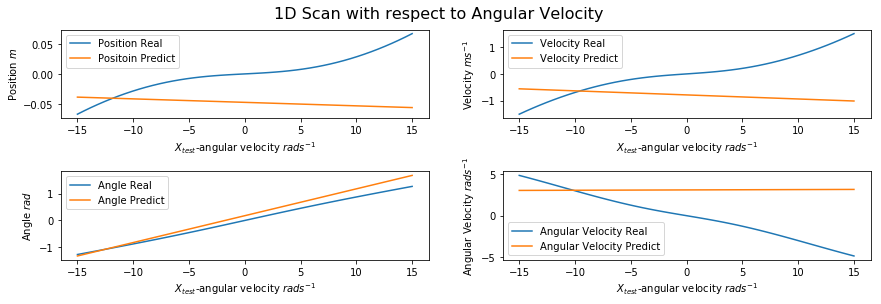

In [42]:
comparison_linear_1D_scan("Angular Velocity",50,W)

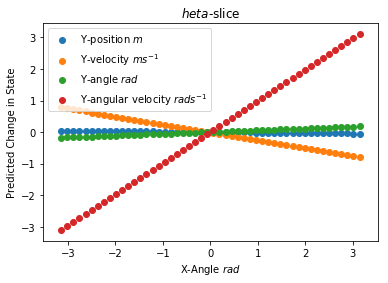

In [17]:
comparison_single_plot_linear_1D_scan(50,"Angle",W)

TASK 2.3

LINEAR PREDICTION DYNAMICS TEST

In [18]:
# this funcition output a matrix which contains the predicted dynamics of the system
# using the linear regression model
def predict(W,t,state):
    S=np.matrix(state).T
    Y=np.empty((4,1))
    for i in range(int(t*10)):
        X=S[:,i]
        Y_predict=X+np.matmul(W.T,X)
        while Y_predict[2,0] < -np.pi:
            Y_predict[2,0] += 2. * np.pi
        while Y_predict[2,0] > np.pi:
            Y_predict[2,0] -= 2. * np.pi
        Y= np.hstack([Y,Y_predict])
        S = np.hstack([S,Y_predict])
    Y=Y[:,1:]
    return Y
# this funcitions compares the predicted dynamics wiht the actual dynamics of the system
def predict_plot(t=100,x=0,v=0,o=np.pi,w=0):
    cart=CartPole()
    state=np.array([x,v,o,w])
    T=np.arange(0,t,cart.delta_time)
    Y_real=dynamic(t,state)
    Y_predict=predict(W,t,state)
    stateplot_plot_comparison(T,Y_real,Y_predict,'Time $s$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$', r" State Plot $x$={} m,$v$ = {} ms-1, $\theta$={} rad, $\omega$ = {} rads-1".format(state[0],state[1],state[2],state[3]))

In [19]:
interact(predict_plot,t=(0,100,10), x=(-10, 10, 0.25), v=(-10, 10, 1), o=(-np.pi,np.pi,0.25),w=(-15,15,1));

interactive(children=(IntSlider(value=100, description='t', step=10), FloatSlider(value=0.0, description='x', …

Task 2.4

KERNEL FUNCTION

In [43]:


def sum_inputs(X,Z):
    X = np.asarray(X)
    Z = np.asarray(Z)
    Diff=X[:,np.newaxis] - Z
    r2=Diff**2
    return r2

def sum_inputs_periodic(X,Z):
    X = np.asarray(X)
    Z = np.asarray(Z)
    Diff=X[:,np.newaxis] - Z
    r2=np.sin(Diff/2)**2
    return r2


def kernel_func(l,X,Z):
    
    pos_exp=sum_inputs(X[0,:].T,Z[0,:].T)/l[0]
    vel_exp=sum_inputs(X[1,:].T,Z[1,:].T)/l[1]
    angle_exp=sum_inputs_periodic(X[2,:].T,Z[2,:].T)/l[2]
    angvel_exp=sum_inputs(X[3,:].T,Z[3,:].T)/l[3]
    r2=pos_exp+vel_exp+angle_exp+angvel_exp
    #r2=vel_exp+angle_exp+angvel_exp
    return np.exp(-0.5*r2)


NON-LINEAR LEAST SQUARES MODEL

In [44]:

def Regularised_Least_Squares(l,M,lambd,X,Y):
    X_basis= basis_func(M)
    
    K_mm=kernel_func(l,X_basis,X_basis)
   
    K_nm=kernel_func(l,X,X_basis)
    K_mn = K_nm.T
    
    b=np.matmul(K_mn,Y.T)
    A=np.matmul(K_mn,K_nm)+lambd*K_mm
    W=np.linalg.lstsq(A,b)[0]
    return W,X_basis

1D SCAN NON LINEAR MODEL

In [45]:
def comparison_nonlinear_1D_scan(mode,n,W,X_basis,l):
    X_test,Y_test=model3(n,mode)
    X_test_exp=kernel_func(l,X_test,X_basis)
    Y_mean= np.matmul(W.T,X_test_exp.T)
    if mode=="Position":
        stateplot_plot_comparison(X_test[0,:],Y_test,Y_mean,'$X_{test}$-position $m$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Position")
    elif mode=="Velocity":
        stateplot_plot_comparison(X_test[1,:],Y_test,Y_mean,'$X_{test}$-velocity $ms^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Velocity")
    elif mode=="Angle":
        stateplot_plot_comparison(X_test[2,:],Y_test,Y_mean,'$X_{test}$-angle $rad$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angle")
    elif mode=="Angular Velocity":
        stateplot_plot_comparison(X_test[3,:],Y_test,Y_mean,'$X_{test}$-angular velocity $rads^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angular Velocity")

def comparison_singleplot_nonlinear_1D_scan(n,mode,W,X_basis,l):
    X_test,Y_test=model3(n,mode)
    X_test_exp=kernel_func(l,X_test,X_basis)
    Y_mean= np.matmul(W.T,X_test_exp.T)
    if mode=="Position":
        singleplot_scatter_4(X_test[0,:],Y_mean,"X-position $m$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$x$-slice")
    elif mode=="Velocity":
        singleplot_scatter_4(X_test[1,:],Y_mean,"X-Velocity $ms^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$v$-slice")
    elif mode=="Angle":
        singleplot_scatter_4(X_test[2,:],Y_mean,"X-Angle $rad$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\theta$-slice")
    elif mode=="Angular Velocity":
        singleplot_scatter_4(X_test[3,:],Y_mean,"X-Angular Velocity $rads^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\omega$-slice")

In [50]:
lambd=1e-1
X,Y=data(1000)
l=np.var(X,axis=1).T
l=l*0.5
W,X_basis=Regularised_Least_Squares(l,600,lambd,X,Y)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


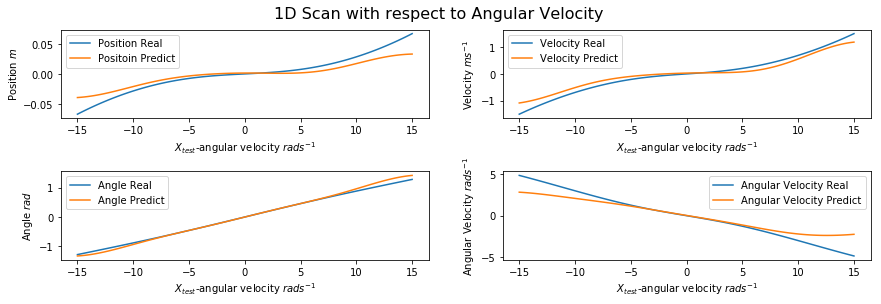

In [55]:
comparison_nonlinear_1D_scan("Angular Velocity",100,W,X_basis,l)

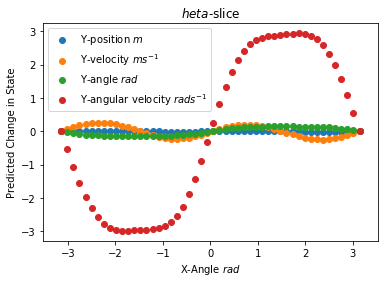

In [48]:
 comparison_singleplot_nonlinear_1D_scan(50,"Angle",W,X_basis,l)

NON LINEAR DYNAMICS PREDICTION
    
    

In [26]:
# this funcition output a matrix which contains the predicted dynamics of the system
# using the linear regression model
def dynamics_non_linear(l,t,state):
    S=np.reshape(state,(4,1))
    X=np.empty((4,1))
    for i in range(int(t*10)):
        X_expanded=kernel_func(l,S,X_basis)
        X_expanded=np.reshape(X_expanded,(X_expanded.shape[0],X_expanded.shape[-1]))
        Y=np.matmul(W.T,X_expanded.T)
        X_predict=S+Y
        while X_predict[2,0] < -np.pi:
            X_predict[2,0] += 2. * np.pi
        while X_predict[2,0] > np.pi:
            X_predict[2,0] -= 2. * np.pi
        S=X_predict
        X=np.hstack([X,X_predict])
        
    X=X[:,1:]
    return X
# this funcitions compares the predicted dynamics wiht the actual dynamics of the system
def plot_dynamics_non_linear(t=50,x=0,v=0,o=np.pi/3,w=0):
    cart=CartPole()
    state=np.array([x,v,o,w])
    T=np.arange(0,t,cart.delta_time)
    Y_real=dynamic(t,state)
    Y_predict=dynamics_non_linear(l,t,state)
    stateplot_plot_comparison(T,Y_real,Y_predict,'Time $s$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$', r"Non-Linear vs Real Dynamics at initial state: $x$={} m,$v$ = {} ms-1, $\theta$={} rad, $\omega$ = {} rads-1".format(state[0],state[1],state[2],state[3]))

In [27]:
interact(plot_dynamics_non_linear,t=(0,20,5), x=(-10, 10, 0.25), v=(-10, 10, 1), o=(-np.pi,np.pi,0.25),w=(-15,15,1));

interactive(children=(IntSlider(value=20, description='t', max=20, step=5), FloatSlider(value=0.0, description…

NON-LINEAR + LINEAR MODEL

In [28]:
def kernel_func_improved(l,X,Z):
    vel_exp=sum_inputs(X[1,:].T,Z[1,:].T)/l[1]
    angle_exp=sum_inputs_periodic(X[2,:].T,Z[2,:].T)/l[2]
    angvel_exp=sum_inputs(X[3,:].T,Z[3,:].T)/l[3]
    r2=vel_exp+angle_exp+angvel_exp
    return np.exp(-0.5*r2)

def Regularised_Least_Squares_improved(l,M,lambd,X,Y):
    X_basis= basis_func(M)
    
    K_mm=kernel_func_improved(l,X_basis,X_basis)
   
    K_nm=kernel_func_improved(l,X,X_basis)
    K_mn = K_nm.T
    
    b=np.matmul(K_mn,Y.T)
    A=np.matmul(K_mn,K_nm)+lambd*K_mm
    W=np.linalg.lstsq(A,b)[0]
    return W,X_basis

In [29]:
def comparison_nonlinear_linear_1D_scan(mode,n,W_non_linear,W_linear,X_basis,l):
    X_test,Y_test=model3(n,mode)
    X_test_exp=kernel_func_improved(l,X_test,X_basis)
    Y_mean= np.matmul(W_non_linear.T,X_test_exp.T)
    Y_mean[0,:]=np.matmul(W_linear.T[0,:],X_test)
    if mode=="Position":
        stateplot_plot_comparison(X_test[0,:],Y_test,Y_mean,'$X_{test}$-position $m$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Position")
    elif mode=="Velocity":
        stateplot_plot_comparison(X_test[1,:],Y_test,Y_mean,'$X_{test}$-velocity $ms^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Velocity")
    elif mode=="Angle":
        stateplot_plot_comparison(X_test[2,:],Y_test,Y_mean,'$X_{test}$-angle $rad$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angle")
    elif mode=="Angular Velocity":
        stateplot_plot_comparison(X_test[3,:],Y_test,Y_mean,'$X_{test}$-angular velocity $rads^{-1}$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$',"1D Scan with respect to Angular Velocity")

def comparison_singleplot_nonlinear_linear_1D_scan(mode,n,W_non_linear,W_linear,X_basis,l):
    X_test,Y_test=model3(n,mode)
    X_test_exp=kernel_func_improved(l,X_test,X_basis)
    Y_mean= np.matmul(W_non_linear.T,X_test_exp.T)
    Y_mean[0,:]=np.matmul(W_linear.T[0,:],X_test)
    if mode=="Position":
        singleplot_scatter_4(X_test[0,:],Y_mean,"X-position $m$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$x$-slice")
    elif mode=="Velocity":
        singleplot_scatter_4(X_test[1,:],Y_mean,"X-Velocity $ms^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$v$-slice")
    elif mode=="Angle":
        singleplot_scatter_4(X_test[2,:],Y_mean,"X-Angle $rad$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\theta$-slice")
    elif mode=="Angular Velocity":
        singleplot_scatter_4(X_test[3,:],Y_mean,"X-Angular Velocity $rads^{-1}$","Predicted Change in State","Y-position $m$","Y-velocity $ms^{-1}$","Y-angle $rad$","Y-angular velocity $rads^{-1}$","$\omega$-slice")
    

In [56]:
lambd=1e-3
X,Y=data(1000)
l=np.var(X,axis=1).T
l=l*0.5
W_non_linear,X_basis=Regularised_Least_Squares_improved(l,2500,lambd,X,Y)
W_linear=linear_regression(1000)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


1D-SCAN OF NON-LINEAR + LINEAR MODEL

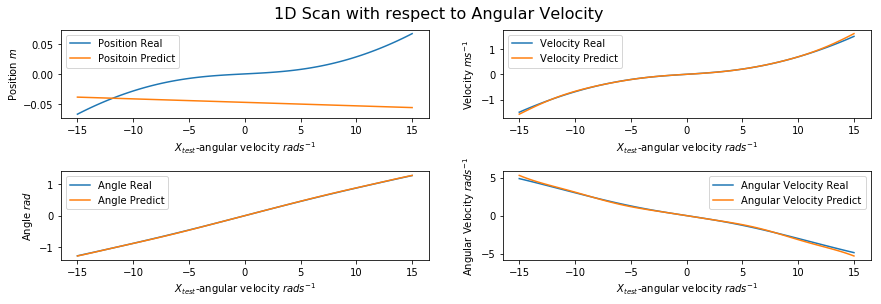

In [61]:
comparison_nonlinear_linear_1D_scan("Angular Velocity",100,W_non_linear,W_linear,X_basis,l)

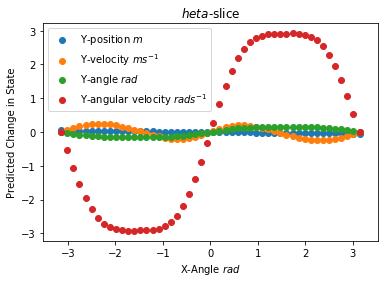

In [32]:
comparison_singleplot_nonlinear_linear_1D_scan("Angle",50,W_non_linear,W_linear,X_basis,l)

NON-LINEAR + LINEAR PREDICTED DYNAMICS

In [33]:
# this funcition output a matrix which contains the predicted dynamics of the system
# using the linear regression model
def dynamics_non_linear_linear(l,t,state):
    S=np.reshape(state,(4,1))
    X=np.empty((4,1))
    for i in range(int(t*10)):
        X_expanded=kernel_func_improved(l,S,X_basis)
        X_expanded=np.reshape(X_expanded,(X_expanded.shape[0],X_expanded.shape[-1]))
        Y=np.matmul(W_non_linear.T,X_expanded.T)
        Y[0,0]=np.matmul(W_linear.T[0,:],S)
        X_predict=S+Y
        while X_predict[2,0] < -np.pi:
            X_predict[2,0] += 2. * np.pi
        while X_predict[2,0] > np.pi:
            X_predict[2,0] -= 2. * np.pi
        S=X_predict
        X=np.hstack([X,X_predict])
        
    X=X[:,1:]
    return X
# this funcitions compares the predicted dynamics wiht the actual dynamics of the system
def plot_dynamics_non_linear_linear(t=20,x=0,v=0,o=np.pi/3,w=0):
    cart=CartPole()
    state=np.array([x,v,o,w])
    T=np.arange(0,t,cart.delta_time)
    Y_real=dynamic(t,state)
    Y_predict=dynamics_non_linear_linear(l,t,state)
    stateplot_plot_comparison(T,Y_real,Y_predict,'Time $s$','Position $m$','Velocity $ms^{-1}$','Angle $rad$','Angular Velocity $rads^{-1}$', r" State Plot $x$={} m,$v$ = {} ms-1, $\theta$={} rad, $\omega$ = {} rads-1".format(state[0],state[1],state[2],state[3]))

In [34]:
interact(plot_dynamics_non_linear_linear,t=(0,20,5), x=(-10, 10, 0.25), v=(-10, 10, 1), o=(-np.pi,np.pi,0.25),w=(-15,15,1));

interactive(children=(IntSlider(value=20, description='t', max=20, step=5), FloatSlider(value=0.0, description…

TASK 2.4 GRID SEARCH

In [84]:
def M_array(n):
    M_array=np.array([10])
    while M_array[-1]<100:
        M_array=np.append(M_array,[M_array[-1]+10])
    while 100<=M_array[-1]<1000:
         M_array=np.append(M_array,[M_array[-1]+100])
    while 1000<=M_array[-1]<n:
         M_array=np.append(M_array,[M_array[-1]+500])
    return M_array

def lambdas_array(n):
    lambdas_array=np.logspace(-6,-1,num=n,base=10,dtype=float)
    return lambdas_array
def grid_search_total(W_linear,W):
    
    X,Y=data(5000)
    l=np.var(X,axis=1).T
    X_test,Y_test=data(2000)
    
    M_arr=M_array(3000)
    lambdas= lambdas_array(50)
    
    rmse_min=9999999
    parameters=np.empty((0,2))
    RMSE=np.array([0])

    for m in M_arr:
        print(m)
        
        for lambd in lambdas:        
            W,X_basis=Regularised_Least_Squares(l,m,lambd,X,Y)
            X_test_exp=kernel_func(l,X_test,X_basis)
            
            X_test_exp=np.reshape(X_test_exp,(X_test_exp.shape[0],X_test_exp.shape[-1]))
    
        
            Y_predict= np.matmul(W.T,X_test_exp.T)
            Y_predict[0,:]=np.matmul(W_linear.T[0,:],X_test)
            Y_error=np.square(Y_predict - Y_test)
    
            rmse_variables =np.sqrt(np.mean(Y_error,axis=1))
            rmse_total=np.mean(rmse_variables,axis=0)[0,0]
            parameters=np.vstack([parameters,[m,lambd]])
            RMSE=np.append(RMSE,[rmse_total])
    
            if rmse_total<rmse_min:
                parameters_best=np.array([m,lambd])
                rmse_min=rmse_total
                X_basis_min = X_basis
                W_best = W
        
    return parameters_best,parameters.T,RMSE[1:],X_basis_min,W_best,l

def grid_search_M(W_linear,W):
    
    X,Y=data(7000)
    l=np.var(X,axis=1).T
    X_test,Y_test=data(2000)
    
    M_arr=M_array(7000)
    lambd=2e-4
    
    rmse_min=9999999
    parameters=np.empty((0,2))
    RMSE=np.array([0])

    for m in M_arr:
        print(m)
                
        W,X_basis=Regularised_Least_Squares(l,m,lambd,X,Y)
        X_test_exp=kernel_func(l,X_test,X_basis)
            
        X_test_exp=np.reshape(X_test_exp,(X_test_exp.shape[0],X_test_exp.shape[-1]))
    
        
        Y_predict= np.matmul(W.T,X_test_exp.T)
        Y_predict[0,:]=np.matmul(W_linear.T[0,:],X_test)
        Y_error=np.square(Y_predict - Y_test)
    
        rmse_variables =np.sqrt(np.mean(Y_error,axis=1))
        rmse_total=np.mean(rmse_variables,axis=0)[0,0]
        parameters=np.vstack([parameters,[m,lambd]])
        RMSE=np.append(RMSE,[rmse_total])
    
        if rmse_total<rmse_min:
            parameters_best=np.array([m,lambd])
            rmse_min=rmse_total
            X_basis_min = X_basis
            W_best = W
        
    return parameters_best,parameters.T,RMSE[1:],X_basis_min,W_best,l

def grid_search_lambda(W_linear,W):
    
    X,Y=data(5000)
    l=np.var(X,axis=1).T
    X_test,Y_test=data(2000)
    
    M=2500
    lambdas=lambdas_array(100)
    
    rmse_min=9999999
    parameters=np.empty((0,2))
    RMSE=np.array([0])
    i=0
    for lambd in lambdas:
        W,X_basis=Regularised_Least_Squares(l,M,lambd,X,Y)
        X_test_exp=kernel_func(l,X_test,X_basis)
            
        X_test_exp=np.reshape(X_test_exp,(X_test_exp.shape[0],X_test_exp.shape[-1]))
    
        
        Y_predict= np.matmul(W.T,X_test_exp.T)
        Y_predict[0,:]=np.matmul(W_linear.T[0,:],X_test)
        Y_error=np.square(Y_predict - Y_test)
    
        rmse_variables =np.sqrt(np.mean(Y_error,axis=1))
        rmse_total=np.mean(rmse_variables,axis=0)[0,0]
        parameters=np.vstack([parameters,[M,lambd]])
        RMSE=np.append(RMSE,[rmse_total])
    
        if rmse_total<rmse_min:
            parameters_best=np.array([M,lambd])
            rmse_min=rmse_total
            X_basis_min = X_basis
            W_best = W
        i=i+1
        print(i)
        
    return parameters_best,parameters.T,RMSE[1:],X_basis_min,W_best,l
    
    
    

In [74]:
best_parameters,parameters,RMSE=grid_search_M(W_linear,W_non_linear)[:3]

10
20
30
40
50
60
70
80
90
100


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


200
300
400
500
600
700
800
900
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


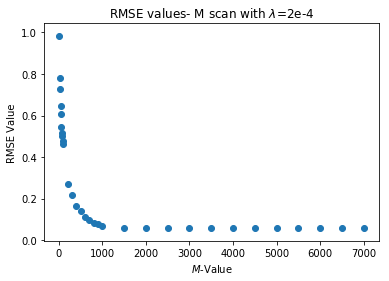

[7.e+03 2.e-04]


In [76]:
singleplot_scatter(parameters[0,:],RMSE,"$M$-Value","RMSE Value","RMSE values- M scan with $\lambda$=2e-4")
print(best_parameters)

In [82]:
best_parameters,parameters,RMSE=grid_search_lambda(W_linear,W_non_linear)[:3]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


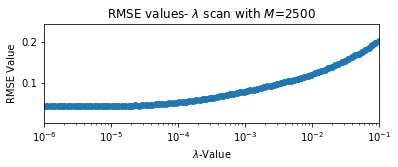

In [83]:

singleplot_scatter_log(parameters[1,:],RMSE,"$\lambda$-Value","RMSE Value","RMSE values- $\lambda$ scan with $M$=2500")

In [86]:

parameters_best,parameters,MSE,X_basis,W,l=grid_search_total(W_linear,W_non_linear)

10
20


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


30
40
50
60
70
80
90
100
200
300
400
500
600
700
800
900
1000
1500
2000
2500
3000


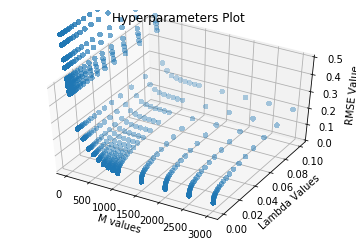

[3.00000000e+03 6.55128557e-06]


In [87]:

Plot_3D(parameters[0,:],parameters[1,:],MSE,"M values","Lambda Values","RMSE Value","Hyperparameters Plot")
print(parameters_best)